In [2]:
import os
import librosa
import numpy as np
import tensorflow as tf
import seaborn as sns
from skimage.transform import resize
import matplotlib.pyplot as plt
from IPython.display import Audio

In [3]:
import numpy as np
import matplotlib
import seaborn
print("Numpy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", seaborn.__version__)


Numpy version: 1.26.4
Matplotlib version: 3.8.4
Seaborn version: 0.13.2


In [4]:
!pip install --upgrade pillow numpy cycler kiwisolver python-dateutil


   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 1.4 MB/s eta 0:00:02
   -------------------- ------------------- 1.3/2.6 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.6 MB 10.3 MB/s eta 0:00:01
   ------------- -------------------------- 4.2/12.6 MB 14.8 MB/s eta 0:00:01
   ------------- -------------------------- 4.2/12.6 MB 14.8 MB/s eta 0:00:01
   -------------- ------------------------- 4.5/12.6 MB 6.2 MB/s eta 0:00:02
   --------------- ------------------------ 4.7/12.6 MB 4.2 MB/s eta 0:00:02
   --------------- ------------------------ 5.0/12.6 MB 3.8 MB/s eta 0:00:03
   --------------- -----------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.7.6 requires thinc<8.3.0,>=8.2.2, which is not installed.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.2 which is incompatible.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.1.2 which is incompatible.


In [5]:
#Loading Model
model = tf.keras.models.load_model(r"D:\Tag\Musical_Instruments_Classification\Trained_model.h5")

In [6]:
# Define instrument classes
classes = ['Accordion', 'Acoustic_Guitar', 'Banjo', 'Bass_Guitar', 'Clarinet', 'cowbell', 'Cymbals', 'Dobro', 'Drum_set', 'Electro_Guitar', 'Floor_Tom', 'flute', 'Harmonica', 'Harmonium', 'Hi_Hats', 'Horn', 'Keyboard', 'Mandolin', 'Organ', 'Piano', 'Saxophone', 'Shakers', 'Tambourine', 'Trombone', 'Trumpet', 'Ukulele', 'vibraphone', 'Violin']

In [7]:
# Load and preprocess audio data
def load_and_preprocess_data(file_path, target_shape=(150, 150)):
    audio_data, sample_rate = librosa.load(file_path, sr=None)
    
    # Define chunk and overlap durations
    chunk_duration = 4  # seconds
    overlap_duration = 2  # seconds
    
    # Convert durations to samples
    chunk_samples = chunk_duration * sample_rate
    overlap_samples = overlap_duration * sample_rate
    
    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
    
    chunks = []
    for i in range(num_chunks):
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples
        
        # Ensure chunk length does not exceed audio length
        if end > len(audio_data):
            end = len(audio_data)
            start = end - chunk_samples
        
        chunk = audio_data[start:end]
        
        # Compute the Mel spectrogram for the chunk
        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
        mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
        chunks.append(mel_spectrogram)
    
    return np.array(chunks), sample_rate, chunk_duration, overlap_duration

In [8]:
# Function to make predictions on chunks
def model_prediction(chunks):
    y_pred = model.predict(chunks)
    return y_pred

In [9]:
# Visualize the instrument probabilities over time
def plot_instrument_usage(y_pred, chunk_duration, overlap_duration):
    time_steps = np.arange(y_pred.shape[0]) * (chunk_duration - overlap_duration)
    
    plt.figure(figsize=(15, 8))
    for i, instrument in enumerate(classes):
        plt.plot(time_steps, y_pred[:, i], label=instrument)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Probability')
    plt.title('Instrument Usage Over Time')
    plt.legend(loc='upper right')
    plt.show()

In [10]:
# Plot Mel Spectrograms of some chunks
def plot_spectrograms(chunks, sample_rate, n_chunks=3):
    plt.figure(figsize=(15, 5))
    for i in range(min(n_chunks, chunks.shape[0])):
        plt.subplot(1, n_chunks, i + 1)
        plt.title(f'Chunk {i+1}')
        mel_spectrogram = chunks[i].squeeze()  # Remove single-dimensional entries
        librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=sample_rate, y_axis='mel', x_axis='time')
        plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step


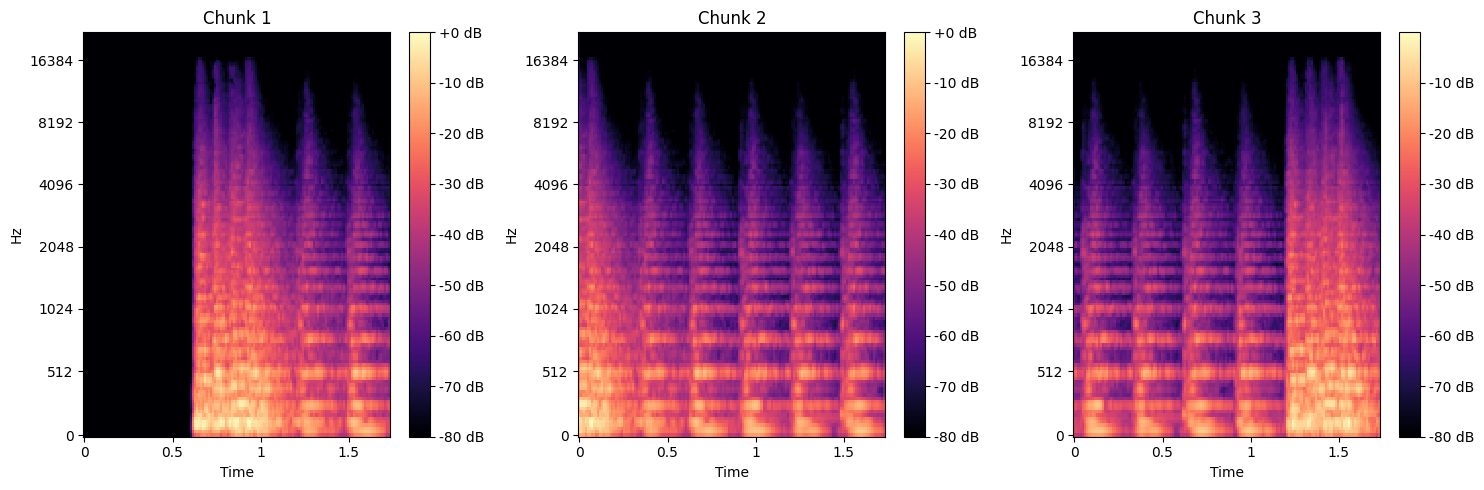

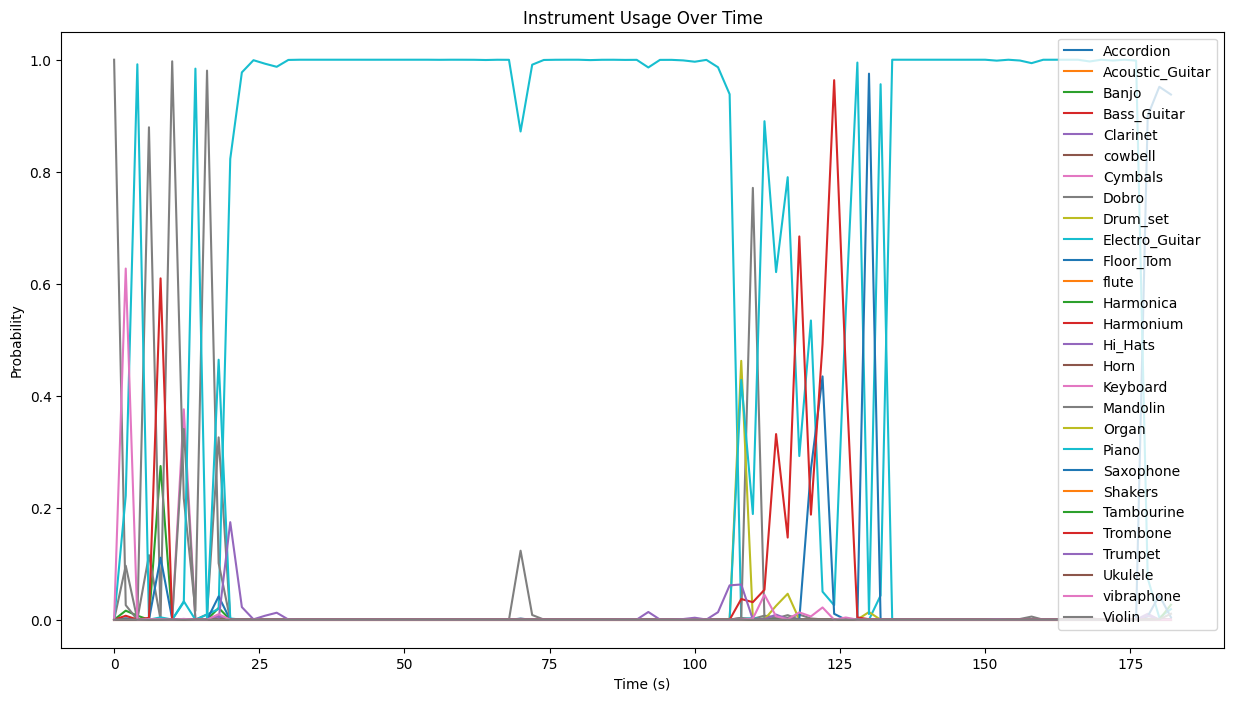

In [13]:
# Main code to load data, make predictions, and plot results
file_path = r"D:\Tag\Musical_Instruments_Classification\Test Songs\Mankatha-Theme-Music-Yuvan-Shankar-Raja.mp3"
chunks, sample_rate, chunk_duration, overlap_duration = load_and_preprocess_data(file_path)
y_pred = model_prediction(chunks)
plot_spectrograms(chunks, sample_rate)
plot_instrument_usage(y_pred, chunk_duration, overlap_duration)

In [12]:
Audio(data=librosa.load(file_path, sr=None)[0], rate=sample_rate)